# Bibliotecas

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# 1. Carregando base de dados

In [32]:
df = pd.read_csv("./winequality-white_new.csv")

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1.001,3.00,0.45,6,"R$ 45.512,00"
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.000,3.30,0.49,6,"R$ 45.421,00"
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,9.951,3.26,0.44,6,"R$ 45.301,00"
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,6,"R$ 45.544,00"
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,6,"R$ 45.544,00"


# 2. Tipos de dados

In [34]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  quality               4898 non-null   int64  
 11  alcohol               4898 non-null   str    
dtypes: float64(10), int64(1), str(1)
memory usage: 459.3 KB


# 3. Corrigindo dados

In [35]:
def corrigir_preco(preco:str)->float:
    return float(preco.replace(".","").replace(",",".").replace("R$","").replace(" ",""))

In [36]:
df["alcohol_new"] = df["alcohol"].apply(corrigir_preco) 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,alcohol_new
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1.001,3.00,0.45,6,"R$ 45.512,00",45512.0
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.000,3.30,0.49,6,"R$ 45.421,00",45421.0
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,9.951,3.26,0.44,6,"R$ 45.301,00",45301.0
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,6,"R$ 45.544,00",45544.0
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,6,"R$ 45.544,00",45544.0


# 4. Analisar os dados

In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol_new
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4.898000e+03
mean,6.854788,11.216659,0.334192,6.391415,40.608069,35.308085,138.360657,113.540098,3.188267,0.489847,5.877909,1.823234e+12
std,0.843868,67.987301,0.121020,5.072058,24.967489,17.007137,42.498065,232.603169,0.151001,0.114126,0.885639,3.468549e+13
min,3.800000,0.080000,0.000000,0.600000,0.020000,2.000000,9.000000,0.990000,2.720000,0.220000,3.000000,8.000000e+00
25%,6.300000,0.210000,0.270000,1.700000,33.000000,23.000000,108.000000,9.943000,3.090000,0.410000,5.000000,4.533100e+04
50%,6.800000,0.270000,0.320000,5.200000,41.000000,34.000000,134.000000,98.948500,3.180000,0.470000,6.000000,4.539300e+04
75%,7.300000,0.330000,0.390000,9.900000,48.000000,46.000000,167.000000,99.418000,3.280000,0.550000,6.000000,4.548200e+04
max,14.200000,965.000000,1.660000,65.800000,346.000000,289.000000,440.000000,999.000000,3.820000,1.080000,9.000000,9.733333e+14


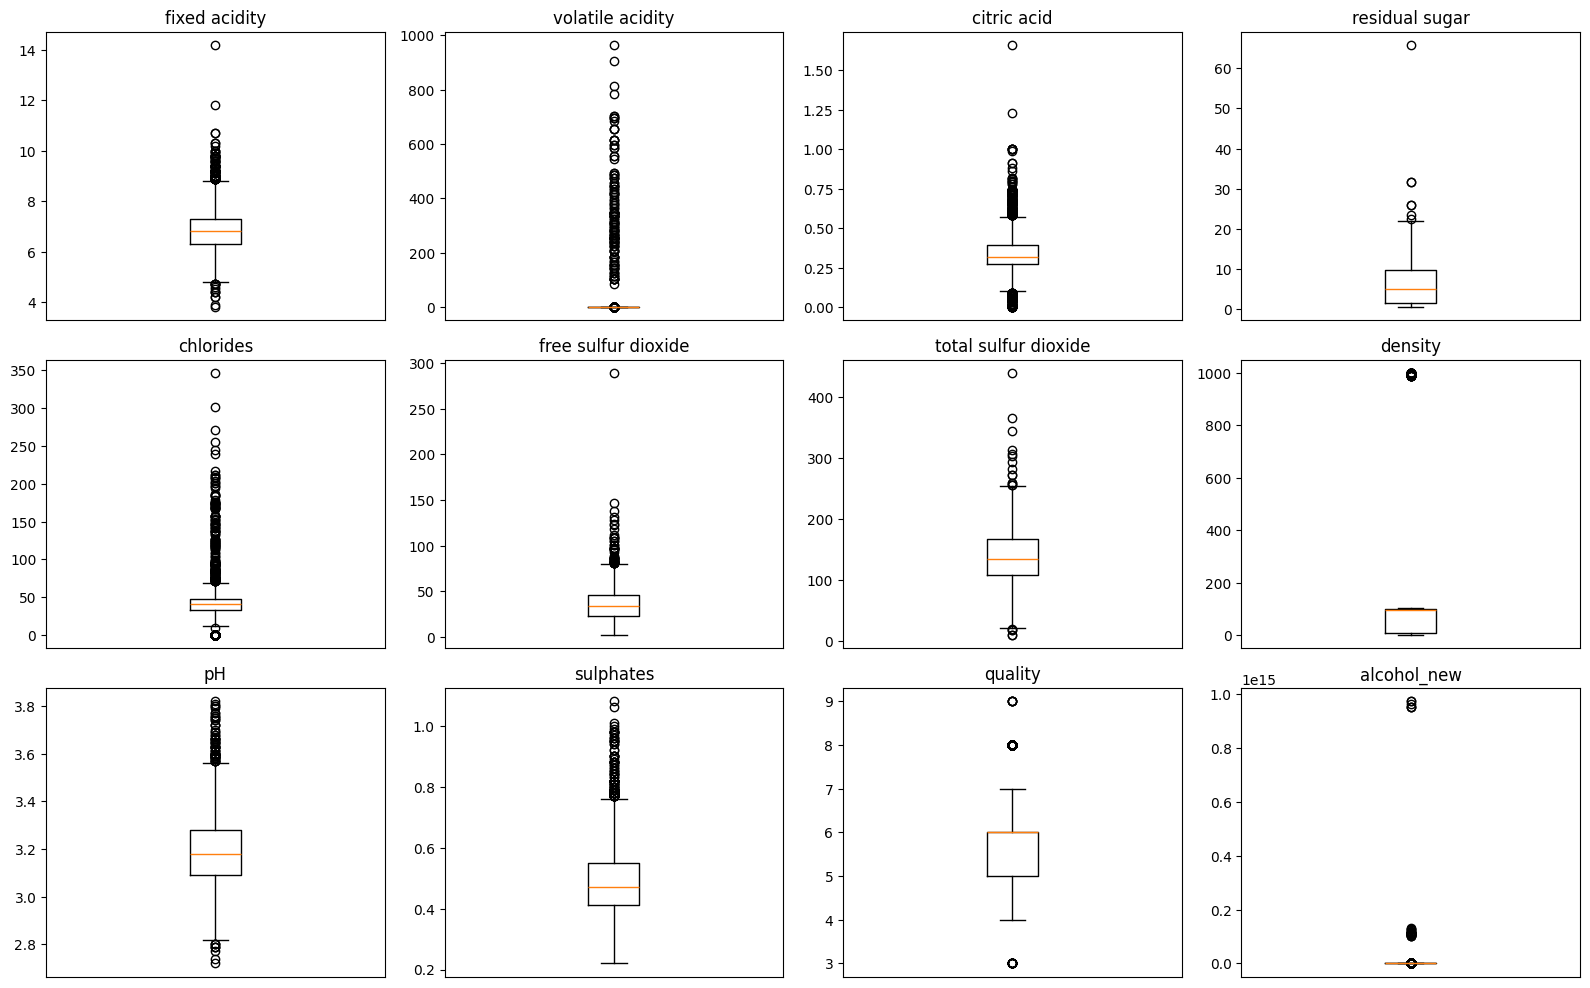

In [51]:
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(df.drop(["alcohol"],axis=1).columns):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)
    axes[i].set_xticks([])

plt.tight_layout()
plt.show()

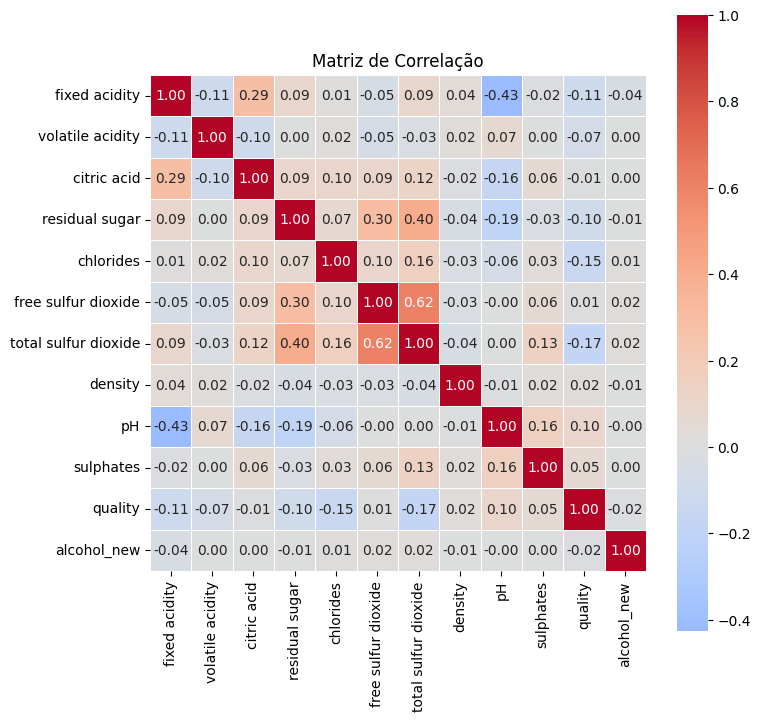

In [56]:
corr_matrix = df.corr(numeric_only=True)

fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot=True,          # mostra valores
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Matriz de Correlação")
plt.show()

# 5. Removendo Outliers

## 5.1 Método IQR (25%)

In [67]:
df_num = df.select_dtypes(include=np.number)

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df_num < (Q1 - 1.5 * IQR)) | 
                (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

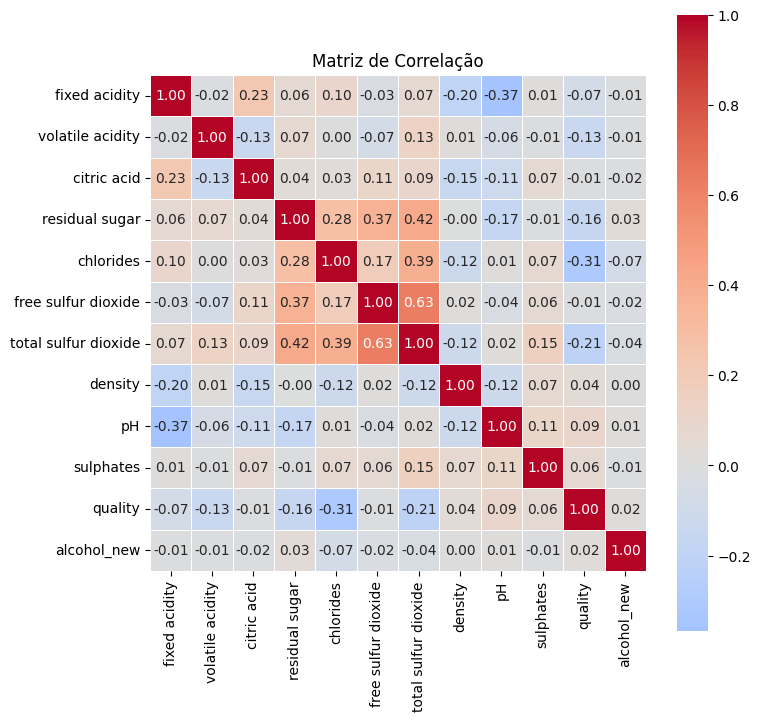

In [68]:
corr_matrix = df_clean.corr(numeric_only=True)

fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot=True,          # mostra valores
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Matriz de Correlação")
plt.show()

## 5.2 Método Z-Score

In [65]:
df_num = df.select_dtypes(include=np.number)

z_scores = np.abs(stats.zscore(df_num))
df_clean = df[(z_scores < 3).all(axis=1)]

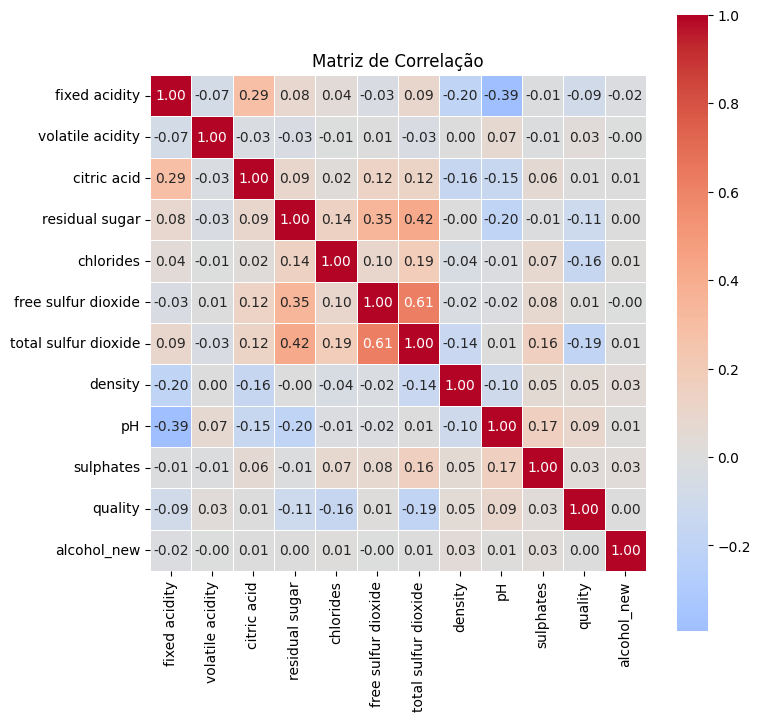

In [66]:
corr_matrix = df_clean.corr(numeric_only=True)

fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot=True,          # mostra valores
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Matriz de Correlação")
plt.show()

# 6. Visualização mais avançada

In [69]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components=3)
pca.fit(df.drop(["alcohol"],axis=1))

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",3
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD 

In [78]:
X = pca.transform(df.drop(["alcohol"],axis=1))

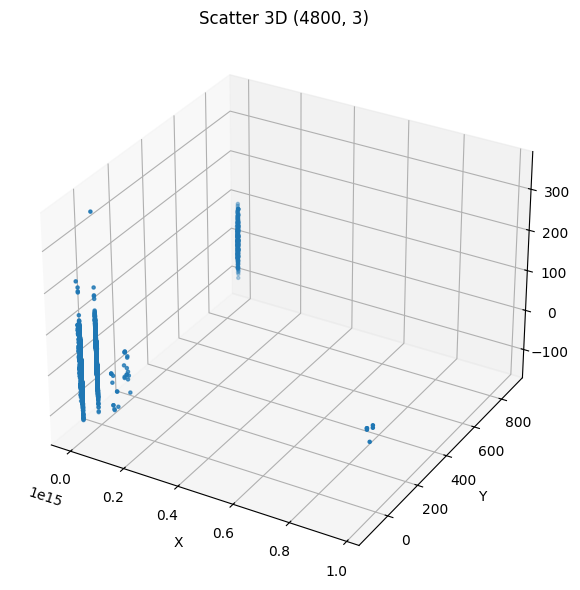

In [79]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

x, y, z = X[:, 0], X[:, 1], X[:, 2]
ax.scatter(x, y, z, s=5)  

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Scatter 3D (4800, 3)")

plt.tight_layout()
plt.show()


# 7. Split de dados

In [80]:
from sklearn.model_selection import train_test_split

In [83]:
target = "pH"
X, y = df.drop(["alcohol",target],axis=1), df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
target = "quality"
X, y = df.drop(["alcohol",target],axis=1), df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 8. Treinando com diferentes algoritmos

## 8.1 Regressão

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [97]:
def eval_reg(model, X_test, y_test, name="model"):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name:>15} | R2={r2:.4f} | MAE={mae:.4f} | RMSE={rmse:.4f}")
    print("")

In [98]:

# 1) Decision Tree (não precisa scaler)
dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=None,      # ajuste opcional
    min_samples_leaf=1   # ajuste opcional
)
dt.fit(X_train, y_train)
eval_reg(dt, X_test, y_test, "DecisionTree")

# 2) KNN (PRECISA scaler)
knn = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=7, weights="distance"))
])
knn.fit(X_train, y_train)
eval_reg(knn, X_test, y_test, "KNN")

# 3) Random Forest (não precisa scaler)
rf = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    max_depth=None,          # ajuste opcional
    min_samples_leaf=1       # ajuste opcional
)
rf.fit(X_train, y_train)
eval_reg(rf, X_test, y_test, "RandomForest")

# 4) MLP (PRECISA scaler)
mlp = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", MLPRegressor(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        learning_rate_init=1e-3,
        max_iter=2000,
        random_state=42,
        early_stopping=True
    ))
])
mlp.fit(X_train, y_train)
eval_reg(mlp, X_test, y_test, "MLP")


   DecisionTree | R2=0.0615 | MAE=0.5061 | RMSE=0.8583

            KNN | R2=0.3623 | MAE=0.4679 | RMSE=0.7075

   RandomForest | R2=0.4824 | MAE=0.4662 | RMSE=0.6374

            MLP | R2=0.2378 | MAE=0.6077 | RMSE=0.7735



## 8.2 Classificação

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [95]:
def eval_clf(model, X_test, y_test, name="model"):
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")
    
    print(f"{name:>15} | Acc={acc:.4f} | F1(macro)={f1m:.4f}")
    print(classification_report(y_test, y_pred,zero_division=True))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    classes = np.unique(y_test)

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=classes,
        yticklabels=classes
    )

    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

    print("-" * 80)
    print("")

   DecisionTree | Acc=0.5602 | F1(macro)=0.3579
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.43      0.36      0.39        33
           5       0.57      0.59      0.58       291
           6       0.62      0.59      0.60       440
           7       0.49      0.51      0.50       176
           8       0.39      0.49      0.43        35
           9       1.00      0.00      0.00         1

    accuracy                           0.56       980
   macro avg       0.50      0.36      0.36       980
weighted avg       0.57      0.56      0.56       980



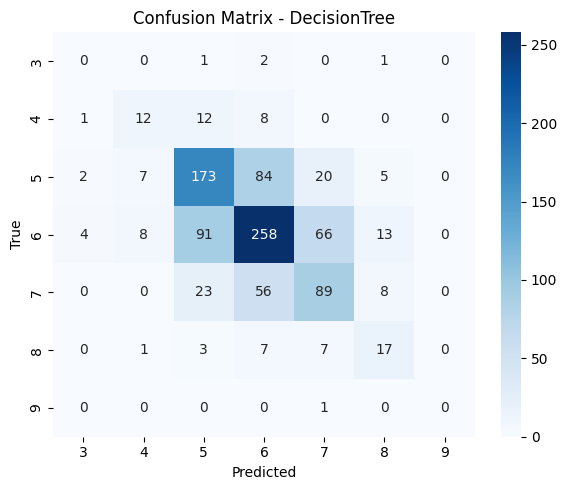

--------------------------------------------------------------------------------

            KNN | Acc=0.5918 | F1(macro)=0.3788
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         4
           4       0.64      0.21      0.32        33
           5       0.63      0.58      0.61       291
           6       0.60      0.69      0.64       440
           7       0.49      0.47      0.48       176
           8       0.75      0.51      0.61        35
           9       1.00      0.00      0.00         1

    accuracy                           0.59       980
   macro avg       0.73      0.35      0.38       980
weighted avg       0.60      0.59      0.59       980



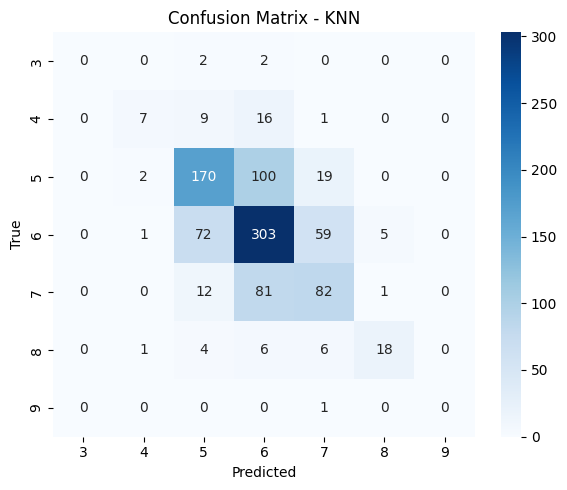

--------------------------------------------------------------------------------

   RandomForest | Acc=0.6561 | F1(macro)=0.4189
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         4
           4       0.73      0.24      0.36        33
           5       0.71      0.57      0.63       291
           6       0.60      0.86      0.71       440
           7       0.83      0.41      0.55       176
           8       1.00      0.51      0.68        35
           9       1.00      0.00      0.00         1

    accuracy                           0.66       980
   macro avg       0.84      0.37      0.42       980
weighted avg       0.69      0.66      0.64       980



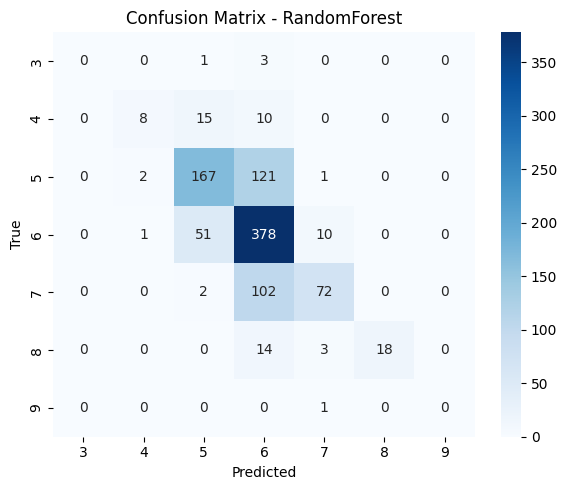

--------------------------------------------------------------------------------

            MLP | Acc=0.4969 | F1(macro)=0.2047
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         4
           4       0.50      0.06      0.11        33
           5       0.53      0.41      0.46       291
           6       0.49      0.76      0.60       440
           7       0.44      0.19      0.27       176
           8       1.00      0.00      0.00        35
           9       1.00      0.00      0.00         1

    accuracy                           0.50       980
   macro avg       0.71      0.20      0.20       980
weighted avg       0.52      0.50      0.46       980



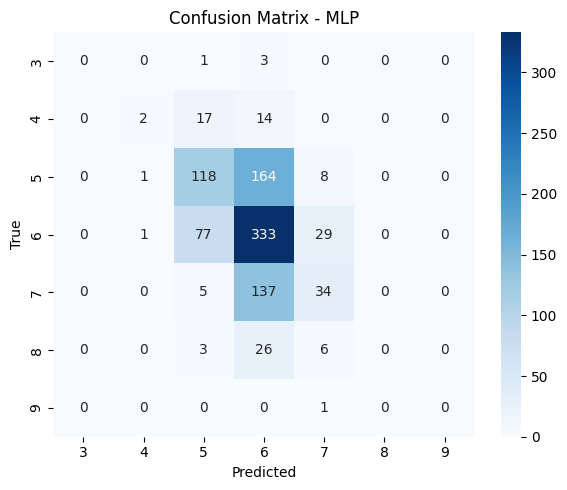

--------------------------------------------------------------------------------



In [96]:
# 1) Decision Tree
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,
    min_samples_leaf=1
)
dt.fit(X_train, y_train)
eval_clf(dt, X_test, y_test, "DecisionTree")

# 2) KNN (PRECISA scaler)
knn = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=7, weights="distance"))
])
knn.fit(X_train, y_train)
eval_clf(knn, X_test, y_test, "KNN")

# 3) Random Forest (geralmente baseline forte)
rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"  # ajuda se tiver desbalanceado
)
rf.fit(X_train, y_train)
eval_clf(rf, X_test, y_test, "RandomForest")

# 4) MLP (PRECISA scaler)
mlp = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        learning_rate_init=1e-3,
        max_iter=2000,
        random_state=42,
        early_stopping=True
    ))
])
mlp.fit(X_train, y_train)
eval_clf(mlp, X_test, y_test, "MLP")
